In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
# Download data set
df = pd.read_csv('https://drive.google.com/uc?id=1WRRikGZ_DCgioxm1NGORp7xa4itHRVcc&confirm=t&uuid=50742ec4-25a5-4196-b54e-38ea28882b71&at=AHV7M3cQOatyBQ8YtVlVBcNOSBX2:1670427300799')

In [3]:
# Get counts of row for a specific race and return a percentage
def get_perc(x):
    condition = df['race'] == x
    temp = pd.DataFrame(df[condition])
    count = temp[temp.columns[0]].count()
    df_count = df[df.columns[0]].count()
    return (count/df_count) * 100

In [4]:
# Pipeline 
def pipeline(mar, ed):
    # default conditions
    condition1 = df['age'] == 35.0
    condition2 = df['sex'] == 1.0
    condition3 = df['st'] == 36.0
    pipe_df = df[condition1 & condition2 & condition3]
    
    mar_condition = pipe_df['mar'] == mar
    ed_condition = pipe_df['education'] == ed
    
    pipe_df = pipe_df[mar_condition & ed_condition]
    
    # Remove outliers
    Q1 = pipe_df['spm_resources'].quantile(0.25)
    Q1
    # # # Calculate Q3
    Q3 = pipe_df['spm_resources'].quantile(0.75)
    Q3
    # # # Define the Inter Quartile Range (IQR)
    IQR = Q3 - Q1
    IQR
    # # # Make select condition for the values that fall below the Q1 - 1.5*IQR
    outliers_below = pipe_df['spm_resources'] < (Q1 - 1.5 * IQR)
    # # # Make select condition for the values that fall above the Q3 - 1.5*IQR
    outliers_above = pipe_df['spm_resources'] > (Q3 + 1.5 * IQR)
    # outliers_above
    # # # Select the INVERSE of the selection
    to_plot = pipe_df[ ~(outliers_above | outliers_below) ]
    
    # Boxplot setup
    a4_dims = (13,8)
    fig, ax = plt.subplots(figsize=a4_dims)
    temp = sns.boxplot(data=to_plot, x=to_plot['race'], y=to_plot['spm_resources'], showfliers = False)
    temp.set_xticks(range(4))
    temp.set_xticklabels(['White', 'Black', 'Asian', 'Other'])
    plt.xlabel("Race")
    plt.ylabel("Income")
    medians = to_plot.groupby(['race'])['spm_resources'].median().values
    vertical_offset = to_plot['spm_resources'].median() * 0.05

    for xtick in temp.get_xticks():
        temp.text(xtick,medians[xtick]+ vertical_offset,medians[xtick].astype(int),
                    horizontalalignment='center',size='x-large',color='black',weight='semibold')

# Disclaimer: White has more representation in our data set

<AxesSubplot: xlabel='Race', ylabel='Percentage'>

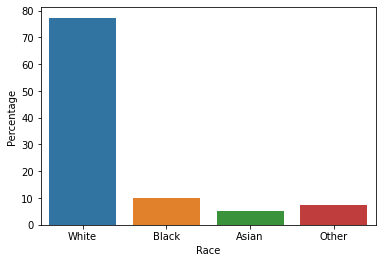

In [5]:
temp_count = {'Race': ['White', 'Black', 'Asian', 'Other'], 'Percentage': [get_perc(1.0), get_perc(2.0), get_perc(3.0), get_perc(4.0)]}
temp_count_df = pd.DataFrame(data=temp_count)
sns.barplot(data=temp_count_df, x='Race', y='Percentage')

# 35 years old, Married, Male with a College Education from New York

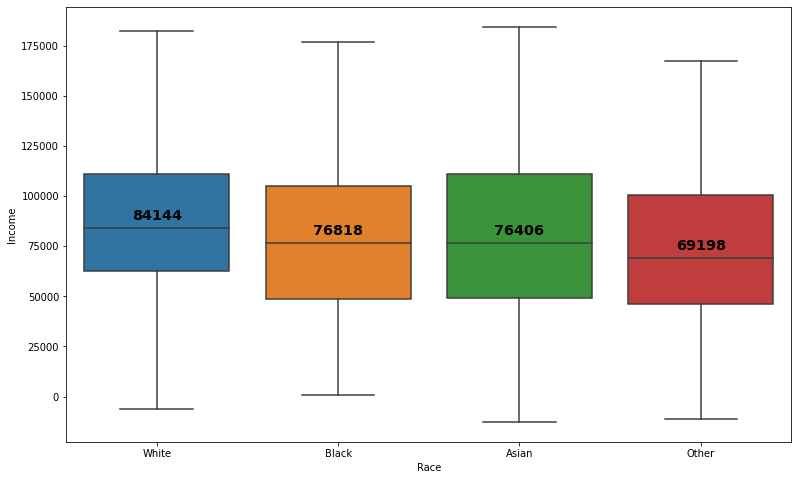

In [6]:
pipeline(1.0, 4.0)

# 35 years old, Single, Male with a College Degree from New York

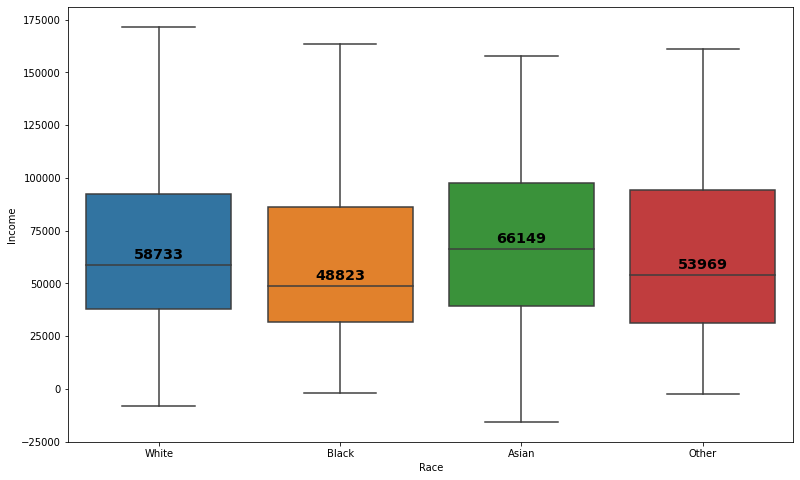

In [7]:
pipeline(5.0, 4.0)

# 35 years old, Married, Male with some College Education from New York

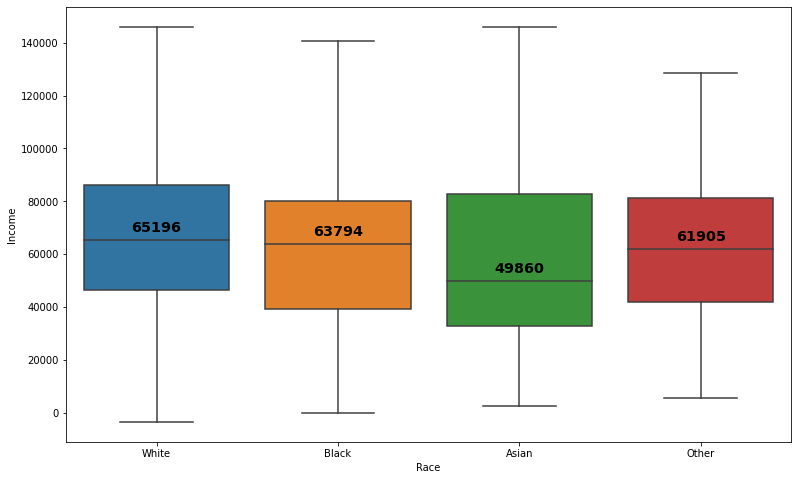

In [8]:
pipeline(1.0, 3.0)

# 35 years old, Single, Male with some College Education from New York

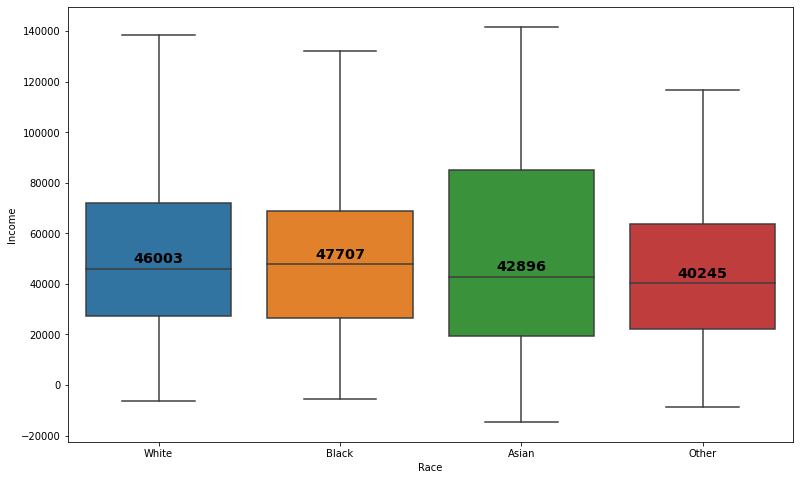

In [9]:
pipeline(5.0, 3.0)